# Assignment 2 - Machine learning and modeling
In this assignment, you work in the same groups you already are divided into. You need to define at least one task based on each of the exercises 4, 5 and 10. All together three tasks. You have to apply the tasks on the same dataset that you used in Assignment 1. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on April 26, 2025 to get bonus points, or before the exam (in which case no bonus points will be awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

# Exercice 4
The tasks are
- Regression
- Clustering
- Decision Trees and Model validation
- SVMs, Hyperparameters, and Cross-Validation

# Exercice 5
The tasks are:
- Permutation feature importance
- Statistical testing
- Dimensionality reduction


## Import and dataset

In [63]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [65]:
df = pd.read_csv("../Total air emissions by greenhouse gas.csv")
df

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"INTERNATIONAL TRANSPORT, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
150,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"AGRICULTURE, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
151,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"SOLVENT USE AND OTHER PRODUCT USE, TOTAL",81.4,81.6,81.4,78.1,82.2,111.0,87.5,121.3,...,31.1,37.0,38.8,34.0,34.0,35.3,38.2,39.6,38.6,38.0
152,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"HEATING OF HOUSES AND PREMISES, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## Regression

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[71203.3, 71338.8, 71022.5, 71242.7, 73749.3, 73135.2, 77030.2, 72145.4, 72526.6, 69370.9, 68131.8, 68886.2, 69501.1, 69812.4, 69132.8, 66251.5, 65901.0, 64741.8, 62344.5, 58122.7, 64123.2, 59742.6, 56829.5, 55209.9, 53481.9, 53283.7, 53198.3, 52294.3, 51434.3, 50196.4, 45981.9, 47721.8, 45215.4, 44386.0]


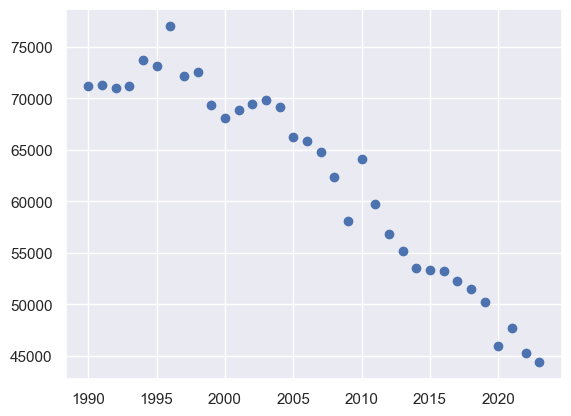

In [66]:
# get x axis, column
col = df.columns
col = col[2:]
x = [int(x) for x in col]
print(x)

# get y axis, first row value
first_row = df.iloc[0].tolist()
first_row = first_row[2:]
y = [float(x) for x in first_row]
print(y)

plt.scatter(x, y)
plt.show()

### Linear regression

Coefficient: [[-929.19854851]]
Intercept: [1926751.29640947]


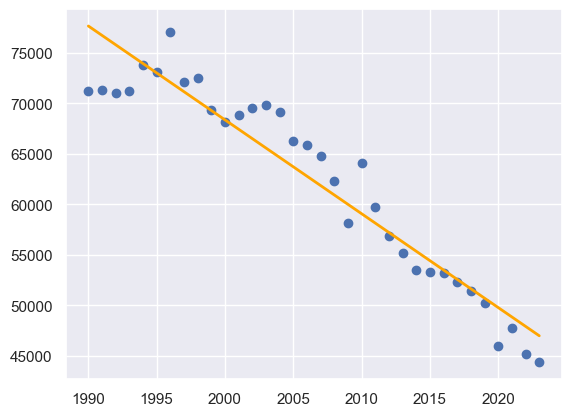

In [67]:
from sklearn.linear_model import LinearRegression

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

yfit = model.predict(x)
plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)
plt.show()

### Polynomial regression

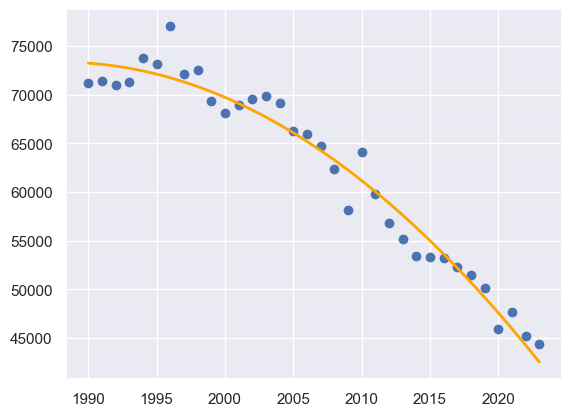

In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial 2 cause i don't think more is needed
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(x, y)

yfit = poly_model.predict(x)

plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)


## Clustering


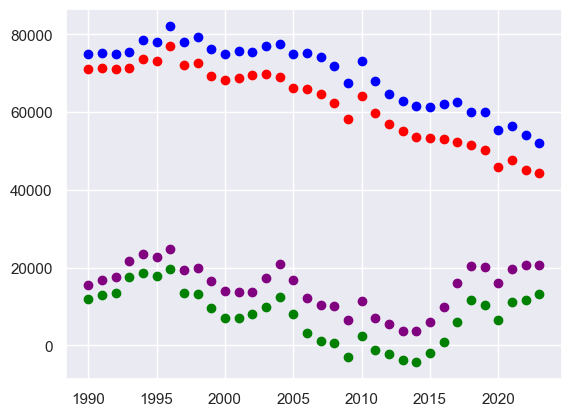

In [69]:
# get other rows
def get_row(i):
    row = df.iloc[i].tolist()
    row = row[2:] # remove first 2 col
    convert = [float(x) for x in row] # convert to float
    return np.array(convert).reshape(-1, 1)

y_0 = get_row(0)
y_1 = get_row(1)
y_2 = get_row(2)
y_3 = get_row(3)

plt.scatter(x, y_0, color='red')   # First line, red
plt.scatter(x, y_1, color='blue')  # Second line, blue
plt.scatter(x, y_2, color='green') # Third line, green
plt.scatter(x, y_3, color='purple') # Third line, green
plt.show()

### K Mean

In [ ]:
X = []
Y = []
for index, y in enumerate([y_0, y_1, y_2, y_3]):
    X.append(np.column_stack((x, y)))
    Y.extend([index for _ in range(len(y))])

X = np.concatenate(X, axis=0)
Y = np.array(Y)
print(X)
print(Y)

[[ 1990.  71203.3]
 [ 1991.  71338.8]
 [ 1992.  71022.5]
 [ 1993.  71242.7]
 [ 1994.  73749.3]
 [ 1995.  73135.2]
 [ 1996.  77030.2]
 [ 1997.  72145.4]
 [ 1998.  72526.6]
 [ 1999.  69370.9]
 [ 2000.  68131.8]
 [ 2001.  68886.2]
 [ 2002.  69501.1]
 [ 2003.  69812.4]
 [ 2004.  69132.8]
 [ 2005.  66251.5]
 [ 2006.  65901. ]
 [ 2007.  64741.8]
 [ 2008.  62344.5]
 [ 2009.  58122.7]
 [ 2010.  64123.2]
 [ 2011.  59742.6]
 [ 2012.  56829.5]
 [ 2013.  55209.9]
 [ 2014.  53481.9]
 [ 2015.  53283.7]
 [ 2016.  53198.3]
 [ 2017.  52294.3]
 [ 2018.  51434.3]
 [ 2019.  50196.4]
 [ 2020.  45981.9]
 [ 2021.  47721.8]
 [ 2022.  45215.4]
 [ 2023.  44386. ]
 [ 1990.  74942.3]
 [ 1991.  75103.8]
 [ 1992.  74935.1]
 [ 1993.  75408.3]
 [ 1994.  78554. ]
 [ 1995.  78019.4]
 [ 1996.  82142.9]
 [ 1997.  78075.2]
 [ 1998.  79334.1]
 [ 1999.  76342.5]
 [ 2000.  75005.4]
 [ 2001.  75591.9]
 [ 2002.  75361.1]
 [ 2003.  77114. ]
 [ 2004.  77559.7]
 [ 2005.  74960.6]
 [ 2006.  75120.3]
 [ 2007.  74083.1]
 [ 2008.  71

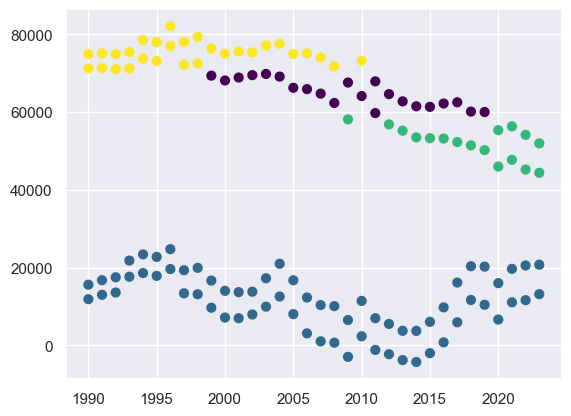

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=1)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Gaussian Mixture Model (GMM)

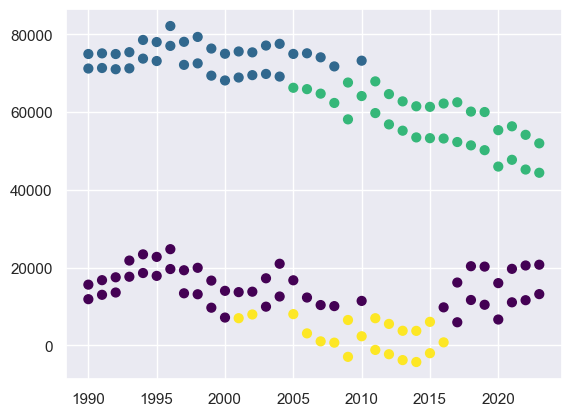

In [74]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4, random_state=0)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Run GMM several times

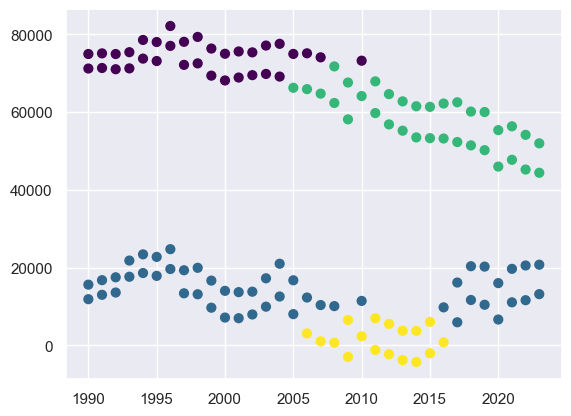

In [75]:
gmm = GMM(n_components=4, n_init=10)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')